In [1]:
import numpy as np
import scipy.optimize
import random
import matplotlib as mpl
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import collections
np.set_printoptions(edgeitems=100, linewidth=100000)


# PAPER BOX PROBLEM [DIFFERENTIATION]

In [2]:
def objective(arr):
    s = arr[0]
    x = arr[1]
    return -x * s**2

def constraint(arr):
    s = arr[0]
    x = arr[1]
    return 2*x + s - 30

x0 = [10, 10]
b = (1, np.inf)
bnds = (b, b)
cons = [{'type':'eq', 'fun':constraint}]
sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)
print(sol)

     fun: -1999.9999999933748
     jac: array([-200.00021362, -399.99916077])
 message: 'Optimization terminated successfully'
    nfev: 17
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([19.99997898,  5.00001051])


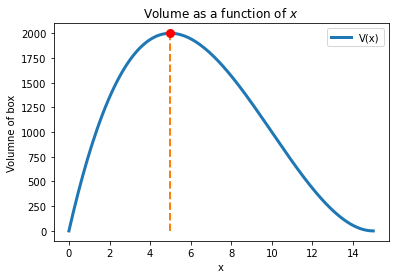

In [3]:
L = 30
x = np.linspace(0, 30/2, 200)
V = lambda x: x * (L-2*x)**2

# plt.style.use('fivethirtyeight')
plt.plot(x, V(x), label='V(x)', lw=3)
plt.scatter(L/6, V(L/6), lw=3, color='red', zorder=3)
plt.plot([L/6, L/6], [0, V(L/6)], '--', lw=2)

plt.title('Volume as a function of $x$')
plt.ylabel('Volumne of box'); plt.xlabel('x')
plt.legend(loc='best')
# plt.tight_layout()

# ADVERTISEMENT PROBLEM [LEAST SQUARES]

In [4]:
A = np.array([[5, 2],
              [4, 3],
              [6, 7],
              [3, 7]])
v = np.array([9, 9, 9, 9])

def objective(arr):
    x1 = arr[0]
    x2 = arr[1]
    return (5*x1+2*x2-9)**2 + (4*x1+3*x2-9)**2 + (6*x1+7*x2-9)**2 + (3*x1+7*x2-9)**2

def constraint(arr):
    x1 = arr[0]
    x2 = arr[1]
    return 2 - x1 - x2

x0 = [1, 1]
b = (0, 2)
bnds = (b, b)
cons = [{'type':'ineq', 'fun':constraint}]
sol = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)
print(sol)

     fun: 14.448082722964248
     jac: array([0., 0.])
 message: 'Optimization terminated successfully'
    nfev: 17
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.48513572, 0.40327444])


# WORKER-ASSIGNMENT PROBLEM

In [5]:
A = np.array([[5, 6, 1, 6],
              [4, 5, 0, 1],
              [1, 2, 6, 8],
              [7, 2, 1, 1]])
row_ind, col_ind = scipy.optimize.linear_sum_assignment(-A) # we are trying to maximize, hence the minus sign
print(row_ind, col_ind)
print(A[row_ind, col_ind].sum())

[0 1 2 3] [3 1 2 0]
24


# DIET PROBLEM

In [6]:
def optimize(arr):
    x1 = arr[0]
    x2 = arr[1]
    x3 = arr[2]
    return 5*x1 + 7*x2 + 14*x3

def constraint1(arr): # 16x[1] + 5x[2] + 12[x3] >= 100
    return 16*arr[0] + 5*arr[1] + 12*arr[2] - 100

def constraint2(arr): # 150x[1] + 100x[2] + 40x[3] >= 2000
    return 150*arr[0] + 100*arr[1] + 40*arr[2] - 2000

def constraint3(arr): # 150x[1] + 100x[2] + 40x[3] <= 2500
    return 2500 - (150*arr[0] + 100*arr[1] + 40*arr[2])


x0 = [5, 5, 20]
b = (0, np.inf)
bnds = (b, b, b)
con1 = {'type':'ineq', 'fun':constraint1}
con2 = {'type':'ineq', 'fun':constraint2}
con3 = {'type':'ineq', 'fun':constraint3}
cons = [con1, con2, con3]
sol = minimize(optimize, x0, constraints=cons, bounds=bnds)
print(sol)


     fun: 66.66666666674385
     jac: array([ 5.,  7., 14.])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([13.33333333,  0.        ,  0.        ])


# DYNAMIC PROGRAMMING

In [9]:
def solve_DP(arr, M):
    min_penalty = [0 for e in arr]
    previous = [0 for e in arr]
    for j in range(1, len(arr)):
#         list of possible c_ij = {fi + cij}
        min_args = [min_penalty[i] + (M - (arr[j] - arr[i]))**2 for i in range(0, j)]
#         select the lowest penalty to be fj
        min_penalty[j] = min(min_args)
        previous[j] = min_args.index(min(min_args))
    return previous


def shortest_path(arr, prev):
    sol = [arr[-1]]
    current = prev[-1]
    while current != 0:
        sol.insert(0, arr[current])
        current = prev[current]
    sol.insert(0, 0)
    return sol


M = 10

diffs = [random.randint(2, 5) for i in range(100)]
arr = np.cumsum(np.array(diffs))
arr = arr - arr[0]
arr = [i for i in arr if i < 100]
arr.append(100)
print('Sequence', arr)
print(f"No. of hotels: {len(arr)-2}")
prev = solve_DP(arr, M)
print(f"Shortest path: {shortest_path(arr, prev)}")

Sequence [0, 5, 7, 9, 12, 17, 19, 23, 25, 30, 34, 39, 41, 43, 46, 48, 51, 56, 59, 64, 69, 74, 77, 79, 84, 87, 90, 94, 97, 100]
No. of hotels: 28
Shortest path: [0, 9, 19, 30, 39, 48, 59, 69, 79, 90, 100]


# MAGNET PROBELM

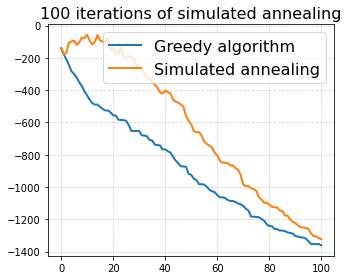

In [111]:
num_magnets = 2**8

def propse_new_state(x, W, energy):
    random_node = np.random.choice( # returns an array sampled from the indices of x (ie. a=len(x))
        a=len(x), size=np.random.randint(1, 5), replace=False 
    ) # size is between & inclusive of 1 and 4 (don't change x too drastically)
    x_new = x.copy()
    x_new[random_node] = -x_new[random_node]
    new_energy = x_new.T @ W @ x_new
    return x_new, W, new_energy


def init_problem(random_state):
    np.random.seed(random_state)
    x = np.random.randint(0, 2, num_magnets) * 2 - 1 # generates a random x
    W = np.random.randn(num_magnets, num_magnets) # generates matrix W sampled from standard normal distribution 
#     W = W.T @ W # not sure why he did this
    W = W - np.diag(np.diag(W)) # set diagonal to 0
#     assert np.allclose(W, W.T, atol=1e-9)
    energy = x.T @ W @ x
    return x, W, energy


num_iters = 100
algo_runs = 5

# Greedy algorithm
data = collections.defaultdict(list)

for algo_run in range(algo_runs):
    x, W, energy = init_problem(algo_run)
    data[0].append(energy)
    for i in range(1, num_iters+1):
        new_x, W, new_energy = propse_new_state(x, W, energy)
        if new_energy < energy:
            x = new_x
            energy = new_energy
        data[i].append(energy)

        
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(
    list(data.keys()), # pass in a list of x-values
    [np.mean(v) for v in data.values()], # pass in a list of y-values
    label="Greedy algorithm",
    lw=2,
)

# Simulated annealing
data = collections.defaultdict(list)

for algo_run in range(algo_runs):
    x, W, energy = init_problem(algo_run)
    data[0].append(energy)
    for i in range(1, num_iters+1):
        new_x, W, new_energy = propse_new_state(x, W, energy)

        # If new solution is worse, accept sometimes
        if new_energy >= energy:
            k = 0.02
            if np.random.rand() < np.exp(-round(i / 10) * i * k):
                x = new_x
                energy = new_energy

        # If new solution is better, always accept
        else:
            x = new_x
            energy = new_energy

        data[i].append(energy)
        
ax.plot(
    list(data.keys()),
    [np.mean(v) for v in data.values()],
    label="Simulated annealing",
    lw=2,
)
ax.grid(True, zorder=-15, ls="--", alpha=0.5)
ax.legend(fontsize=16)
# ax.axes.get_yaxis().set_ticklabels([])

# ax = ax.twinx()

# ax.plot(
#     np.arange(num_iters),
#     np.exp(-np.round((np.arange(num_iters) / 10)) * 10 * k),
#     "--",
#     color="red",
# )
# ax.set_yticks([])
plt.title("100 iterations of simulated annealing", fontsize=16)
plt.tight_layout()
# plt.savefig('simulated_annealing.pdf')
plt.show()

# BAYESIAN OPTIMIZATION

|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  0.1071   | -0.2509   |  0.9014   |
|  2        |  0.7202   |  0.464    |  0.1973   |
|  3        |  0.351    | -0.688    | -0.688    |
|  4        |  0.355    | -0.8838   |  0.7324   |
|  5        |  0.7355   |  0.2022   |  0.4161   |
|  6        |  0.7819   |  0.0806   |  0.01099  |
|  7        |  0.1856   |  0.4561   | -0.528    |
|  8        |  0.8816   |  0.7147   |  0.6494   |
|  9        |  0.8745   |  0.7302   |  0.6298   |
|  10       |  0.8106   |  0.9916   |  0.9997   |
|  11       |  0.5971   |  0.5566   |  1.0      |
|  12       |  0.6854   | -0.4121   |  0.03352  |
|  13       |  0.06673  | -1.0      | -0.007312 |
|  14       |  0.1865   |  1.0      |  0.09963  |
|  15       |  0.974    | -0.1884   | -0.2999   |
|  16       |  0.2144   |  0.2081   | -0.6966   |
|  17       |  0.6934   |  1.0      | -1.0      |
|  18       |  1.004    | -0.1743   | -0.1195   |


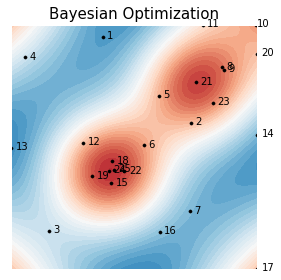

In [138]:
def black_box_function(x, y):
    z = 0.9*np.exp(-((x - 0.5) / 0.5)**2 - ((y - 0.5) / 0.5)**2)
    z = z + np.exp(-((x + 0.2) / 0.5)**2 - ((y + 0.2) / 0.5)**2) # 1/ (1 + (y + 0.3)**2 + (x + 0.3)**2)
    z = z + np.log1p(x*y*x*y)
    return z


from bayes_opt import BayesianOptimization

# Bounded region of parameter space
pbounds = {"x": (-1, 1), "y": (-1, 1)}

optimizer = BayesianOptimization(
    f=black_box_function,
    pbounds=pbounds,
    verbose=2,  # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
    random_state=42,
)

optimizer.maximize(init_points=5, n_iter=20)
N = 32
n = 2 ** 7
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
x, y = np.meshgrid(x, y)
z = black_box_function(x, y)

fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.set_title("Bayesian Optimization", fontsize=15)
# ax.contour(x, y, z, N, linewidths=0.8, colors='k')
ax.contourf(x, y, z, N, cmap="RdBu_r", vmin=-0.2, vmax=1.2)
plt.xticks([])
plt.yticks([])


# Plot points

for i, res in enumerate(optimizer.res):
    plt.scatter(res["params"]["x"], res["params"]["y"], color="k", s=10)
    plt.text(
        res["params"]["x"] + 0.03 + 0.03 * len(str(i)),
        res["params"]["y"] + 0.01,
        str(i+1),
        size=10,
        rotation=0.0,
        ha="center",
        va="center",
    )

ax.axis("off")
plt.tight_layout()
plt.show()
